<a href="https://colab.research.google.com/github/gulsumbudakoglu/Bike-Sharing-Demand-Analysis-/blob/main/Gamze_Bike_Sharing_Demand_Analysis_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Dataset Information

   Bike sharing systems are new generation of traditional bike rentals where whole process from membership, rental and return back has become automatic. Through these systems, user is able to easily rent a bike from a particular position and return back at another position. Currently, there are about over 500 bike-sharing programs around the world which is composed of over 500 thousands bicycles. Today, there exists great interest in these systems due to their important role in traffic, environmental and health issues.

   Apart from interesting real world applications of bike sharing systems, the characteristics of data being generated by these systems make them attractive for the research. Opposed to other transport services such as bus or subway, the duration of travel, departure and arrival position is explicitly recorded in these systems. This feature turns bike sharing system into a virtual sensor network that can be used for sensing mobility in the city. Hence, it is expected that most of important events in the city could be detected via monitoring these data.


### Attribute Information:

Both hour.csv and day.csv have the following fields, except hr which is not available in day.csv

- instant: record index
- dteday : date
- season : season (1:winter, 2:spring, 3:summer, 4:fall)
- yr : year (0: 2011, 1:2012)
- mnth : month ( 1 to 12)
- hr : hour (0 to 23)
- holiday : weather day is holiday or not (extracted from [Web Link])
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
+ weathersit :
- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale)
- atemp: Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale)
- hum: Normalized humidity. The values are divided to 100 (max)
- windspeed: Normalized wind speed. The values are divided to 67 (max)
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered

## Import modules

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')
pd.options.display.max_columns = 999

import seaborn as sns

from matplotlib import pyplot as plt
plt.style.use('seaborn-dark')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from matplotlib import pyplot as plt
plt.style.use('seaborn-dark')


In [2]:
from google.colab import files
uploaded = files.upload()

Saving hour.csv to hour.csv


In [3]:
import io
 
df = pd.read_csv(io.BytesIO(uploaded['hour.csv']))
print(df)

       instant      dteday  season  yr  mnth  hr  holiday  weekday  \
0            1  2011-01-01       1   0     1   0        0        6   
1            2  2011-01-01       1   0     1   1        0        6   
2            3  2011-01-01       1   0     1   2        0        6   
3            4  2011-01-01       1   0     1   3        0        6   
4            5  2011-01-01       1   0     1   4        0        6   
...        ...         ...     ...  ..   ...  ..      ...      ...   
17374    17375  2012-12-31       1   1    12  19        0        1   
17375    17376  2012-12-31       1   1    12  20        0        1   
17376    17377  2012-12-31       1   1    12  21        0        1   
17377    17378  2012-12-31       1   1    12  22        0        1   
17378    17379  2012-12-31       1   1    12  23        0        1   

       workingday  weathersit  temp   atemp   hum  windspeed  casual  \
0               0           1  0.24  0.2879  0.81     0.0000       3   
1              

## Loading the dataset

In [4]:
# statistical info
df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [5]:
# datatype info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [6]:
# unique values
df.apply(lambda x: len(x.unique()))

instant       17379
dteday          731
season            4
yr                2
mnth             12
hr               24
holiday           2
weekday           7
workingday        2
weathersit        4
temp             50
atemp            65
hum              89
windspeed        30
casual          322
registered      776
cnt             869
dtype: int64

## Preprocessing the dataset

In [7]:
# check for null values
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [8]:
df = df.rename(columns={'weathersit':'weather',
                       'yr':'year',
                       'mnth':'month',
                       'hr':'hour',
                       'hum':'humidity',
                       'cnt':'count'})
df.head()

,instant,dteday,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [9]:
df = df.drop(columns=['instant', 'dteday', 'year'])

In [10]:
# change int columns to category
cols = ['season','month','hour','holiday','weekday','workingday','weather']

for col in cols:
    df[col] = df[col].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      17379 non-null  category
 1   month       17379 non-null  category
 2   hour        17379 non-null  category
 3   holiday     17379 non-null  category
 4   weekday     17379 non-null  category
 5   workingday  17379 non-null  category
 6   weather     17379 non-null  category
 7   temp        17379 non-null  float64 
 8   atemp       17379 non-null  float64 
 9   humidity    17379 non-null  float64 
 10  windspeed   17379 non-null  float64 
 11  casual      17379 non-null  int64   
 12  registered  17379 non-null  int64   
 13  count       17379 non-null  int64   
dtypes: category(7), float64(4), int64(3)
memory usage: 1.0 MB


## Exploratory Data Analysis

From the graph below we can see that on weekdays people tend to rent more bicycle around 7AM-8AM and 5PM-6PM. This is due to the regular school and office hours. On weekends, however, we see a different pattern of people renting more bicycle around 12AM-16PM.

[Text(0.5, 1.0, 'Count of bikes during weekdays and weekends')]

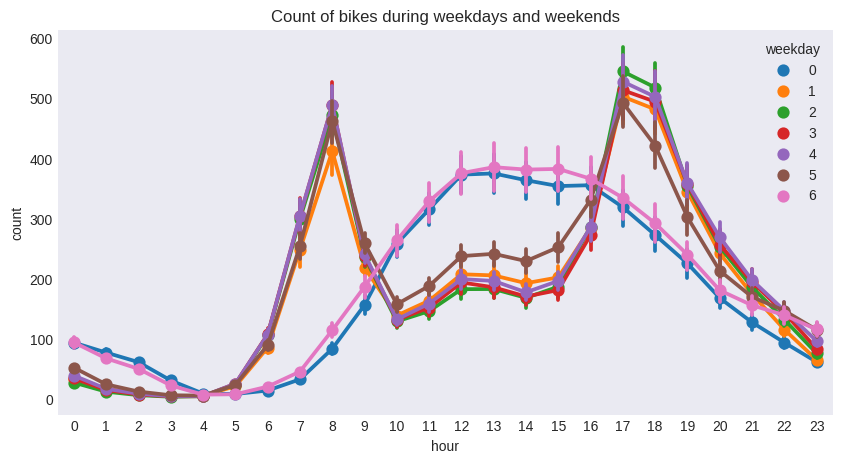

In [11]:
fig, ax = plt.subplots(figsize=(10,5))
sns.pointplot(data=df, x='hour', y='count', hue='weekday', ax=ax)
ax.set(title='Count of bikes during weekdays and weekends')

When we look at the breakdown of registered and casual users we see a strong difference. It seems that the above pattern actually mainly comes from the registered users and causal users do not really abide by the working hours.

[Text(0.5, 1.0, 'Count of bikes during weekdays and weekends: Unregistered users')]

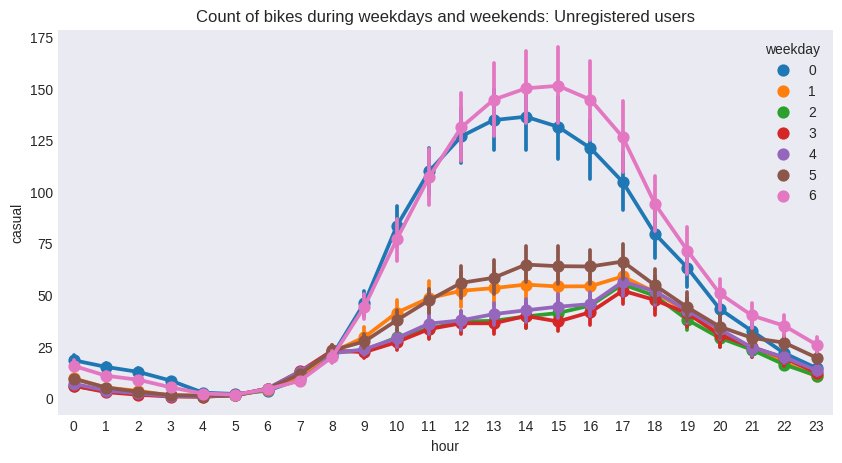

In [12]:
fig, ax = plt.subplots(figsize=(10,5))
sns.pointplot(data=df, x='hour', y='casual', hue='weekday', ax=ax)
ax.set(title='Count of bikes during weekdays and weekends: Unregistered users')

[Text(0.5, 1.0, 'Count of bikes during weekdays and weekends: Registered users')]

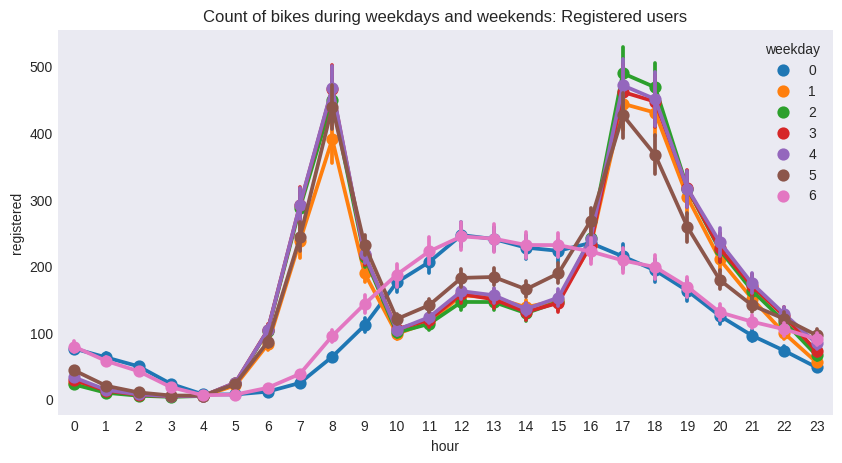

In [13]:
fig, ax = plt.subplots(figsize=(10,5))
sns.pointplot(data=df, x='hour', y='registered', hue='weekday', ax=ax)
ax.set(title='Count of bikes during weekdays and weekends: Registered users')

We see from the following graph that different weathers follow similar patterns in terms of hours however there is a difference in count values. During the harhest weather conditions people tend to rent less bicylcle and vice versa.

[Text(0.5, 1.0, 'Count of bikes during different weathers')]

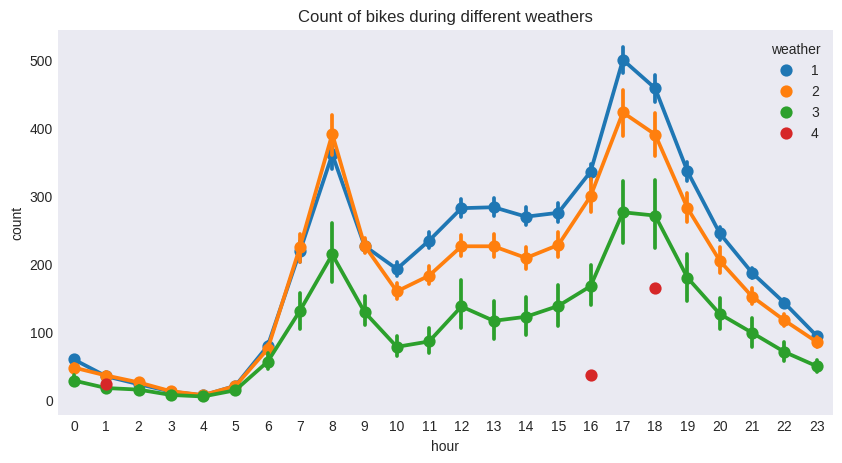

In [14]:
fig, ax = plt.subplots(figsize=(10,5))
sns.pointplot(data=df, x='hour', y='count', hue='weather', ax=ax)
ax.set(title='Count of bikes during different weathers')

Except for Season 1 which seems to be the Winter, all the other seasons follow similar patterns in terms of count values.

[Text(0.5, 1.0, 'Count of bikes during different seasons')]

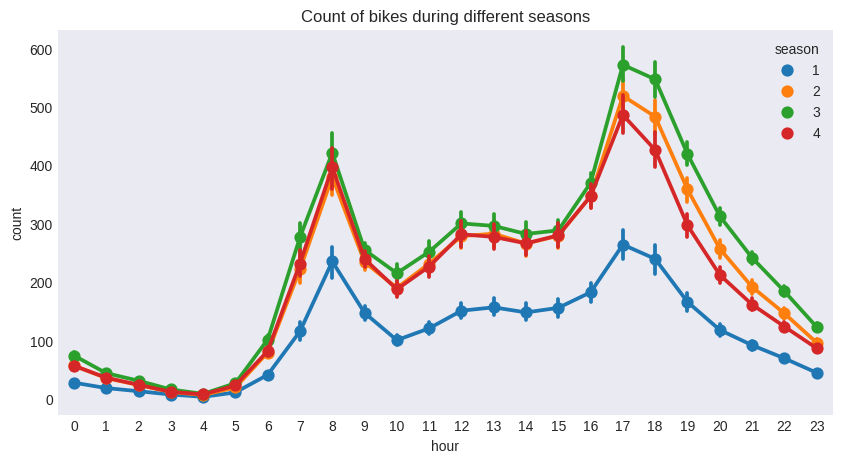

In [15]:
fig, ax = plt.subplots(figsize=(10,5))
sns.pointplot(data=df, x='hour', y='count', hue='season', ax=ax)
ax.set(title='Count of bikes during different seasons')

As expected, we see from the following bar graph that people tend to rent more bikes during spring, summer and autumn. So we can verify that season 1 is Winter.

[Text(0.5, 1.0, 'Count of bikes during different months')]

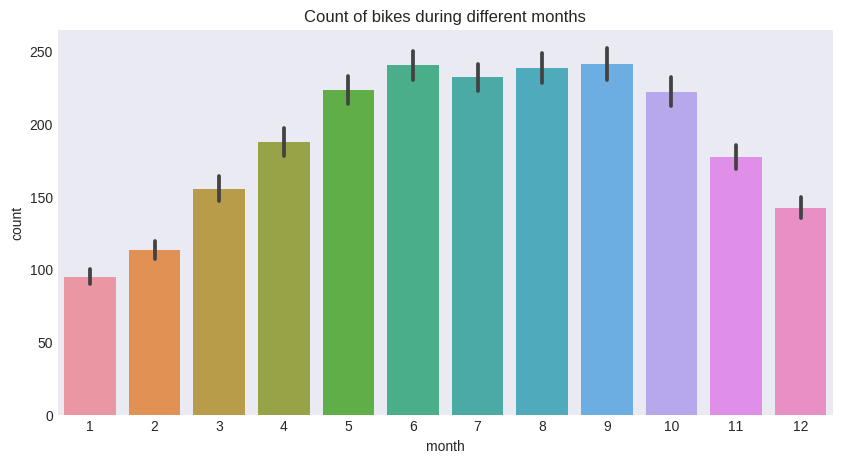

In [16]:
fig, ax = plt.subplots(figsize=(10,5))
sns.barplot(data=df, x='month', y='count', ax=ax)
ax.set(title='Count of bikes during different months')

We see below that count of bikes do not differ significanlty across different days.

[Text(0.5, 1.0, 'Count of bikes during different days')]

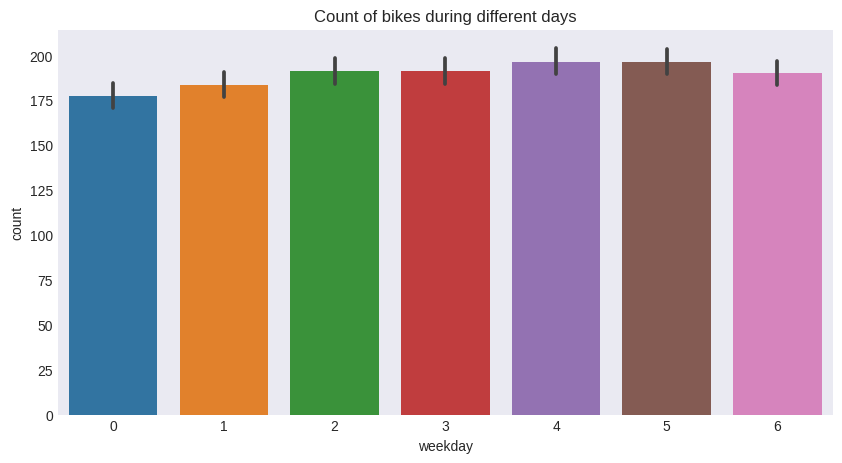

In [17]:
fig, ax = plt.subplots(figsize=(10,5))
sns.barplot(data=df, x='weekday', y='count', ax=ax)
ax.set(title='Count of bikes during different days')

[Text(0.5, 1.0, 'Relation between humidity and users')]

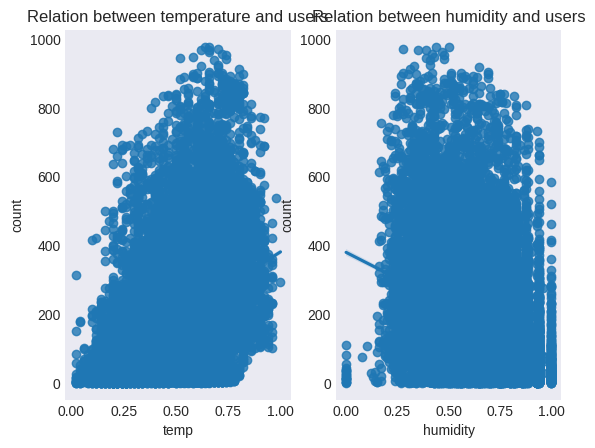

In [18]:
fig, (ax1,ax2) = plt.subplots(ncols=2)
sns.regplot(x=df['temp'], y=df['count'], ax=ax1)
ax1.set(title="Relation between temperature and users")
sns.regplot(x=df['humidity'], y=df['count'], ax=ax2)
ax2.set(title="Relation between humidity and users")

Outlier Analysis

[Text(0.5, 1.0, 'Theoritical quantiles')]

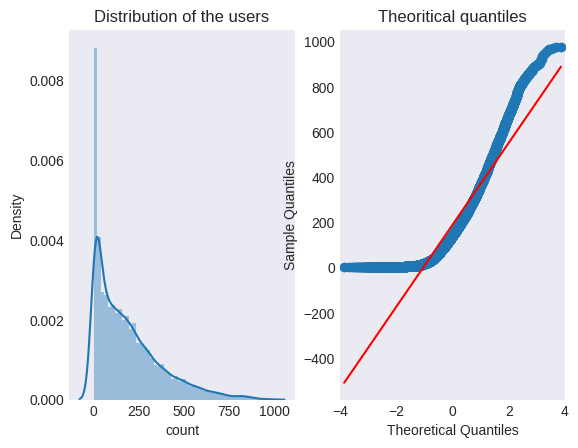

In [19]:
from statsmodels.graphics.gofplots import qqplot
fig, (ax1,ax2) = plt.subplots(ncols=2)
sns.distplot(df['count'], ax=ax1)
ax1.set(title='Distribution of the users')
qqplot(df['count'], ax=ax2, line='s')
ax2.set(title='Theoritical quantiles')

In [20]:
df['count'] = np.log(df['count'])

[Text(0.5, 1.0, 'Theoritical quantiles')]

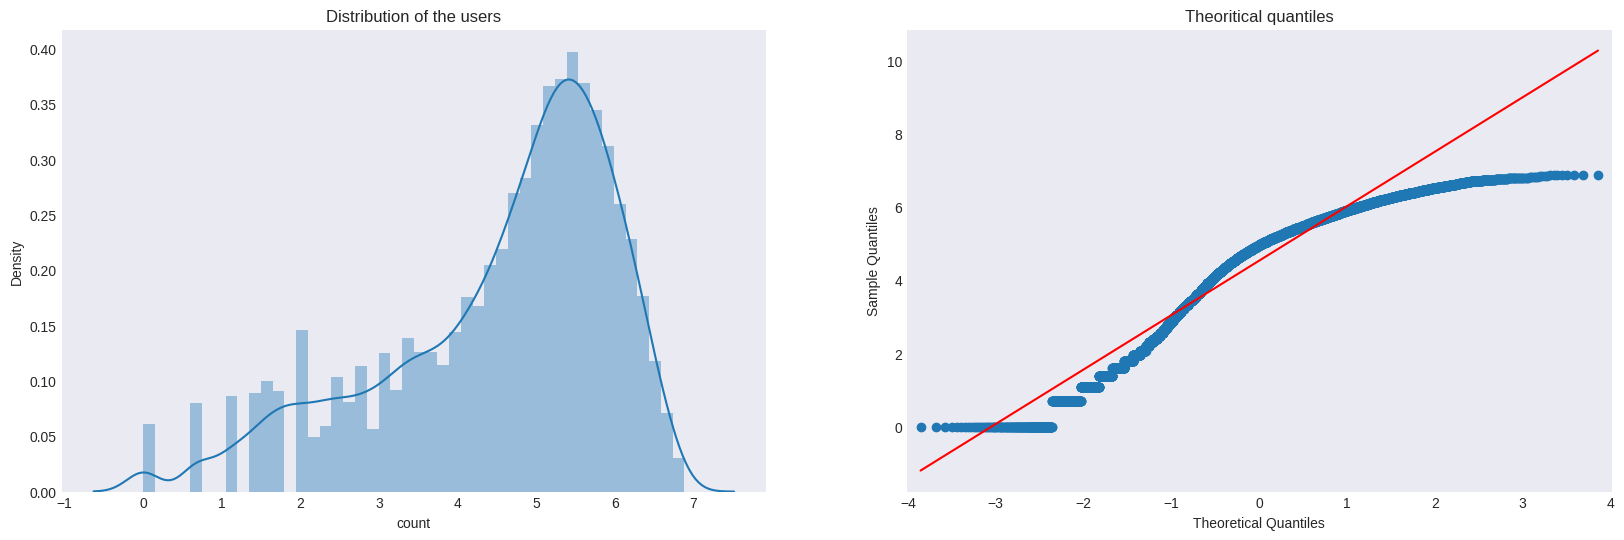

In [21]:
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(20,6))
sns.distplot(df['count'], ax=ax1)
ax1.set(title='Distribution of the users')
qqplot(df['count'], ax=ax2, line='s')
ax2.set(title='Theoritical quantiles')

[Text(0.5, 0, 'Working Day'),
 Text(0, 0.5, 'Count'),
 Text(0.5, 1.0, 'Box Plot On Count Across Working Day')]

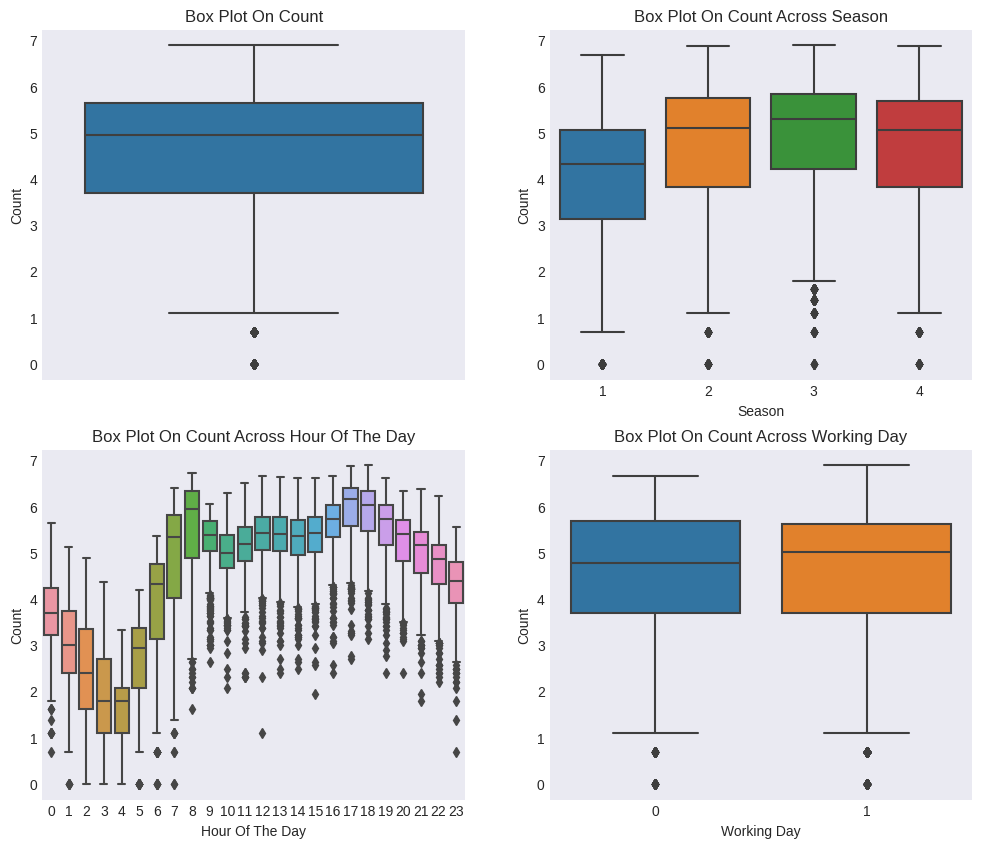

In [22]:
fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(12, 10)
sns.boxplot(data=df,y="count",orient="v",ax=axes[0][0])
sns.boxplot(data=df,y="count",x="season",orient="v",ax=axes[0][1])
sns.boxplot(data=df,y="count",x="hour",orient="v",ax=axes[1][0])
sns.boxplot(data=df,y="count",x="workingday",orient="v",ax=axes[1][1])

axes[0][0].set(ylabel='Count',title="Box Plot On Count")
axes[0][1].set(xlabel='Season', ylabel='Count',title="Box Plot On Count Across Season")
axes[1][0].set(xlabel='Hour Of The Day', ylabel='Count',title="Box Plot On Count Across Hour Of The Day")
axes[1][1].set(xlabel='Working Day', ylabel='Count',title="Box Plot On Count Across Working Day")

From the boxplots above we can infer that:

From Figure 2 we can see that the median value in Spring season has got relatively lower count.

From Figure 3 we can see that the median value are relatively higher at 7AM - 8AM and 5PM - 6PM. It can be attributed to regular school and office users at that time.

From Figure 4 we can tell that most of the outlier points are mainly contributed from "Working Day" than "Non Working Day".

In [23]:
#Removing outliers from the count column
#Defining a new dataframe df2 without the outliers
df2 = df[np.abs(df["count"]-df["count"].mean())<=(3*df["count"].std())]

In [24]:
#Having a look at the shapes of df and df2
print ("Shape Of The Before Ouliers: ",df.shape)
print ("Shape Of The After Ouliers: ",df2.shape)

Shape Of The Before Ouliers:  (17379, 14)
Shape Of The After Ouliers:  (17221, 14)


## Correlation Analysis 



<Axes: >

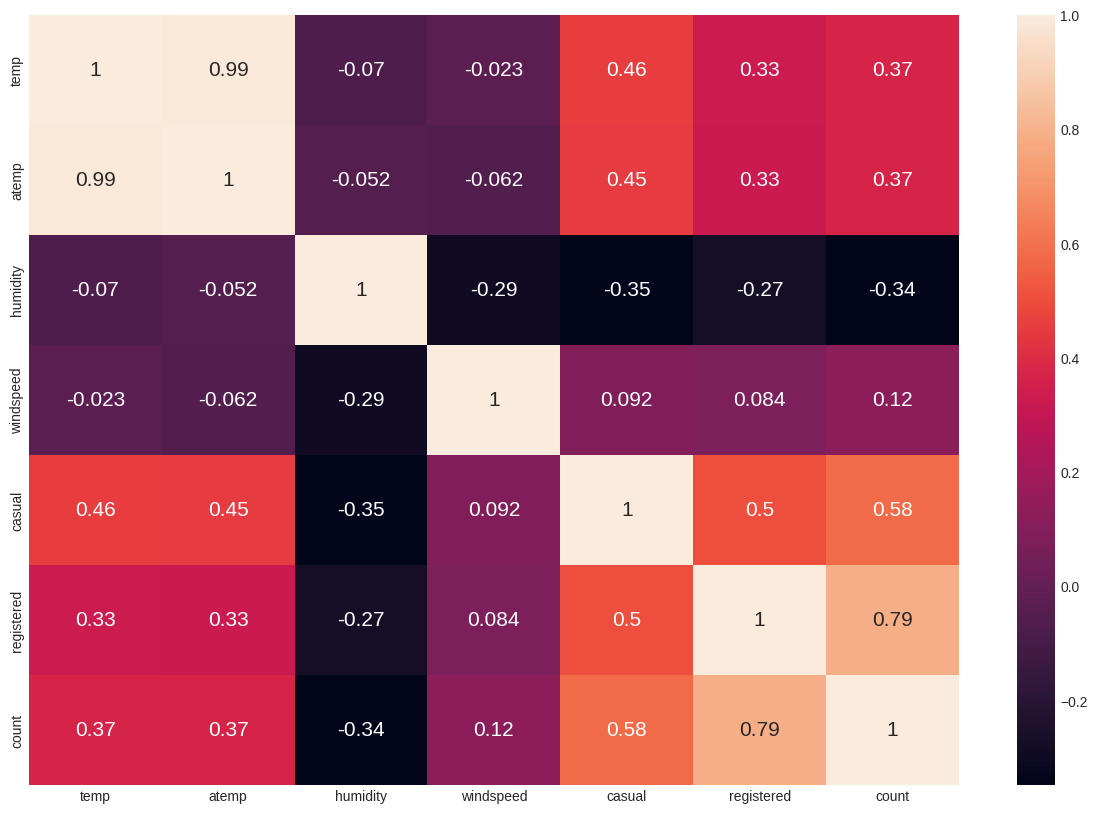

In [25]:
corr = df2.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot=True, annot_kws={'size':15})

It can be seen from the correlation matrix that:
1. Count has a very strong positive relationship with the variable registered.
2. Count has a strong positive relationship with the variable causal.
2. There is a weak negative relationship between count and humidity.
3. There is a weak positive relationship between count and temp.
4. There is a strong relationship (nearly perfect multicollinearity) between atemp and temp. Therefore, we need to drop one of the two in our models later.

## One hot Encoding

In [26]:
pd.get_dummies(df2['season'], prefix='season', drop_first=True)

,season_2,season_3,season_4
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
6,0,0,0
...,...,...,...
17374,0,0,0
17375,0,0,0
17376,0,0,0
17377,0,0,0


In [59]:
df_oh = df2

def one_hot_encoding(data, column):
    data = pd.concat([data, pd.get_dummies(data[column], prefix=column, drop_first=True)], axis=1)
    data = data.drop([column], axis=1)
    return data

cols = ['season','month','hour','holiday','weekday','workingday','weather']

for col in cols:
    df_oh = one_hot_encoding(df_oh, col)
df_oh.head()

,temp,atemp,humidity,windspeed,casual,registered,count,season_2,season_3,season_4,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,holiday_1,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,workingday_1,weather_2,weather_3,weather_4
0,0.24,0.2879,0.81,0.0,3,13,2.772589,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,0.22,0.2727,0.80,0.0,8,32,3.688879,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,0.22,0.2727,0.80,0.0,5,27,3.465736,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0.24,0.2879,0.75,0.0,3,10,2.564949,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
6,0.22,0.2727,0.80,0.0,2,0,0.693147,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


## Input Split

In [60]:
X = df_oh.drop(columns=['atemp', 'windspeed', 'casual', 'registered', 'count'], axis=1)
y = df_oh['count']

## Model Training

In [61]:
from sklearn.linear_model import LinearRegression, Ridge, HuberRegressor, ElasticNetCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor

models = [LinearRegression(),
         Ridge(),
         HuberRegressor(),
         ElasticNetCV(),
         DecisionTreeRegressor(),
         RandomForestRegressor(),
         ExtraTreesRegressor(),
         GradientBoostingRegressor()]

In [62]:
from sklearn import model_selection
def train(model):
    kfold = model_selection.KFold(n_splits=5, shuffle=True, random_state=42)
    pred = model_selection.cross_val_score(model, X, y, cv=kfold, scoring='neg_mean_squared_error')
    cv_score = pred.mean()
    print('Model:',model)
    print('CV score:', abs(cv_score))

In [63]:
for model in models:
    train(model)

Model: LinearRegression()
CV score: 0.42350300131721996
Model: Ridge()
CV score: 0.4234260865786121
Model: HuberRegressor()
CV score: 0.4408715020634865
Model: ElasticNetCV()
CV score: 0.4311452182155925
Model: DecisionTreeRegressor()
CV score: 0.432067563983029
Model: RandomForestRegressor()
CV score: 0.21438604870793015
Model: ExtraTreesRegressor()
CV score: 0.2148441057359478
Model: GradientBoostingRegressor()
CV score: 0.33637067070819143


In [64]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [65]:
model = RandomForestRegressor()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

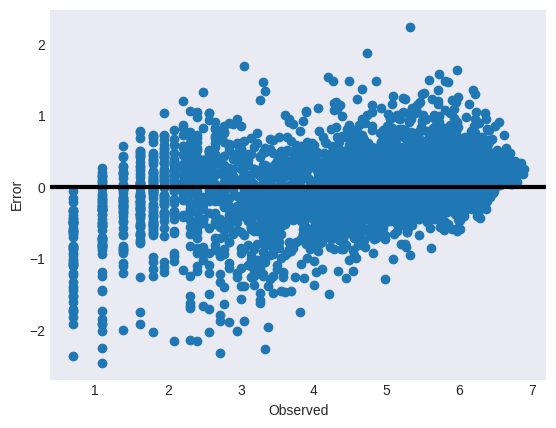

In [66]:
# plot the error difference
error = y_test - y_pred
fig, ax = plt.subplots()
ax.scatter(y_test, error)
ax.axhline(lw=3, color='black')
ax.set_xlabel('Observed')
ax.set_ylabel('Error')
plt.show()

In [35]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_test, y_pred))

0.4665297199356437

## Gülsüm Part

In [67]:
import xgboost
!pip install shap
import shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [68]:
X.head()

,temp,humidity,season_2,season_3,season_4,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,holiday_1,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,workingday_1,weather_2,weather_3,weather_4
0,0.24,0.81,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,0.22,0.80,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,0.22,0.80,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0.24,0.75,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
6,0.22,0.80,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [69]:
y

0        2.772589
1        3.688879
2        3.465736
3        2.564949
6        0.693147
           ...   
17374    4.779123
17375    4.488636
17376    4.499810
17377    4.110874
17378    3.891820
Name: count, Length: 17221, dtype: float64

#### XGBoost Running with Shap Values

##### Results:

* temp, hour4, hour3, humunity have the highest affect for the target
* we have 0.48 r2 score

In [70]:
X_train,X_test,y_train,y_test = train_test_split(X, y, random_state=42)
X_strain,X_valid,y_strain,y_valid = train_test_split(X_train, y_train, random_state=42)

In [71]:
model_depth3 = xgboost.XGBRegressor(learning_rate=0.02, subsample=0.2, colsample_bytree=0.5, n_estimators=5000, base_score=y_strain.mean())
model_depth3.fit(X_strain, y_strain, eval_set=[(X_valid,y_valid)], eval_metric="logloss", verbose=500, early_stopping_rounds=20)

[0]	validation_0-logloss:-138.91467
[318]	validation_0-logloss:-139.12695


XGBRegressor(base_score=4.57534916535292, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.5, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.02, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=5000, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [72]:
y_pred = model.predict(X_test)

In [73]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_test, y_pred))

0.4663731967971429

In [74]:
e3 = shap.TreeExplainer(model_depth3)
shap_values3 = e3.shap_values(X_test)
shap_interaction_values3 = shap.TreeExplainer(model_depth3).shap_interaction_values(X_test)

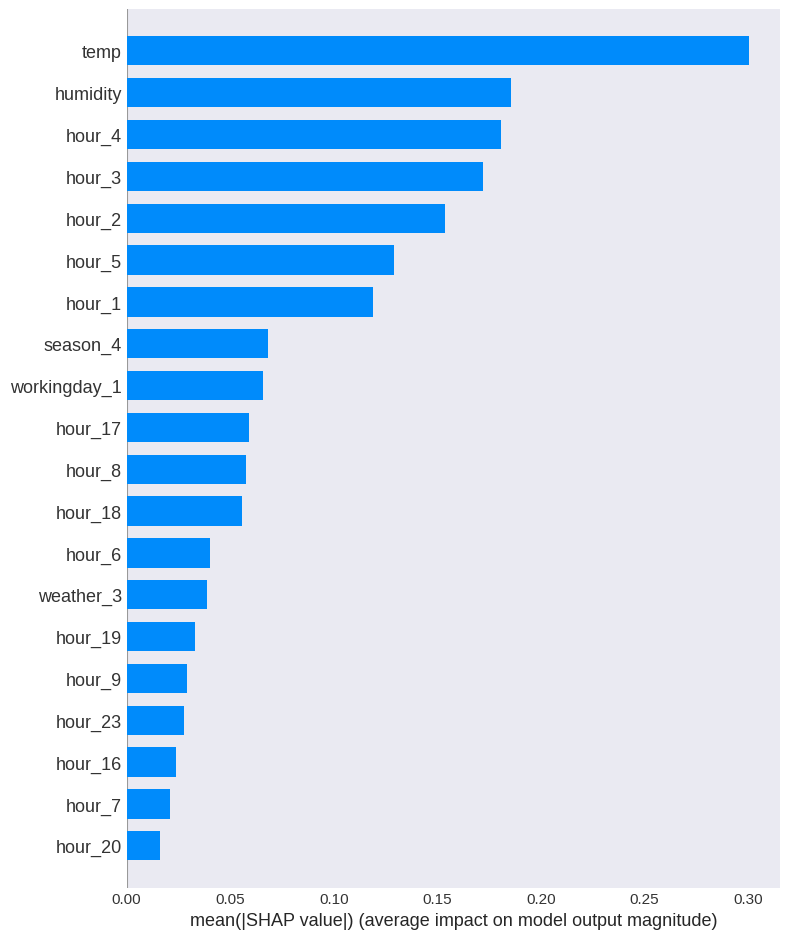

In [75]:
shap.summary_plot(shap_values3, X_test, plot_type="bar")


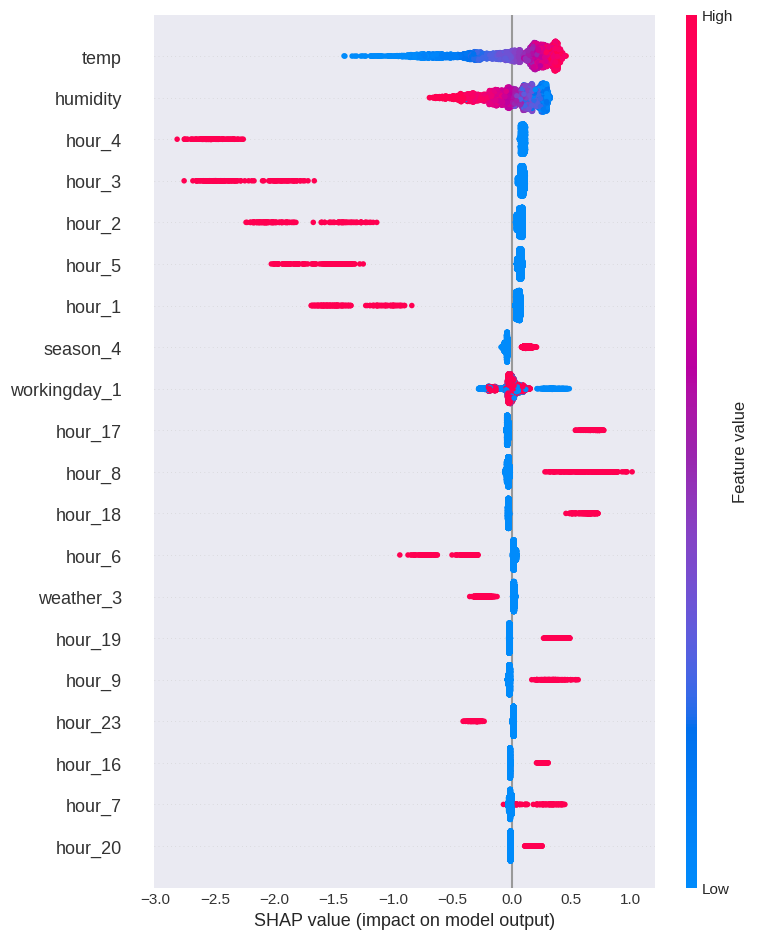

In [45]:
shap.summary_plot(shap_values3, X_test)

### Feature Reduction with PCA and apply XGBOOST

* we have 50 features. Let's try to reduce them with PCA

* R2 score: 0.22 as a result of the model

In [76]:
X = df_oh.drop(columns=['atemp', 'windspeed', 'casual', 'registered', 'count'], axis=1)
y = df_oh['count']

In [77]:
from sklearn.decomposition import PCA
components = 25
pca = PCA(n_components = components)
# perform PCA on the scaled data
pca.fit(X)

PCA(n_components=25)

In [78]:
pca_components = abs(pca.components_)
print(pca_components.sum())

77.16109964425414


In [79]:
X_pca = pca.transform(X)
print(X_pca.shape)
print(X_pca)

(17221, 25)
[[-2.68677624e-01 -2.66809495e-01  1.02302875e+00 ... -2.66830335e-03
  -2.06350894e-03 -9.62896121e-04]
 [-2.73866755e-01 -2.67405131e-01  1.02266022e+00 ... -4.87884089e-02
  -8.50166296e-02  1.60157937e-02]
 [-2.73395923e-01 -2.67410433e-01  1.02424034e+00 ... -4.62743127e-03
  -2.35464137e-02  4.67397963e-03]
 ...
 [-1.21722485e-01 -3.94346515e-02 -3.17547627e-01 ... -3.06490232e-01
   4.03016819e-01 -2.18382365e-01]
 [-1.21283126e-01 -3.86727755e-02 -3.16861515e-01 ...  4.55738862e-01
  -7.55612468e-02  1.63223505e-01]
 [-1.23911950e-01 -4.07301843e-02 -3.19105011e-01 ...  1.14979879e-02
  -1.69298128e-01 -1.92843543e-01]]


In [80]:
df_pca = pd.DataFrame(X_pca).add_prefix('pca_').fillna('')

In [81]:
X = pd.concat([X,df_pca], axis = 1)
X.head()

,temp,humidity,season_2,season_3,season_4,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,holiday_1,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,workingday_1,weather_2,weather_3,weather_4,pca_0,pca_1,pca_2,pca_3,pca_4,pca_5,pca_6,pca_7,pca_8,pca_9,pca_10,pca_11,pca_12,pca_13,pca_14,pca_15,pca_16,pca_17,pca_18,pca_19,pca_20,pca_21,pca_22,pca_23,pca_24
0,0.24,0.81,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-0.268678,-0.266809,1.023029,-0.171839,-0.142624,0.018063,0.004741,-0.024453,0.328467,0.053868,-0.044122,0.049319,0.037743,0.004245,0.009187,0.013793,0.031947,-0.325430,-0.177846,-0.002237,-0.003090,-0.000511,-0.002668,-0.002064,-0.000963
1,0.22,0.80,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-0.273867,-0.267405,1.022660,-0.174265,-0.143694,0.018927,0.003977,-0.026682,0.337787,0.071311,-0.041572,0.044425,0.038023,0.005999,0.004492,0.013864,0.039495,-0.297211,-0.298659,0.010842,-0.035089,0.031658,-0.048788,-0.085017,0.016016
2,0.22,0.80,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-0.273396,-0.267410,1.024240,-0.172228,-0.143640,0.020601,0.005678,-0.025474,0.332216,0.078928,-0.043000,0.043337,0.039886,0.010778,0.005824,0.011824,0.060508,-0.306990,-0.284474,-0.003788,-0.007183,0.011359,-0.004627,-0.023546,0.004674
3,0.24,0.75,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-0.268042,-0.267627,1.028791,-0.172565,-0.147095,0.020148,0.005100,-0.026034,0.322023,0.059208,-0.048508,0.042614,0.042584,0.005961,0.019487,0.022542,0.039517,-0.300123,-0.210915,-0.007295,-0.006463,-0.004273,-0.005115,-0.001104,0.005143
6,0.22,0.80,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-0.269661,-0.265778,1.023276,-0.161634,-0.144410,0.019795,0.005606,-0.026930,0.337750,0.063731,-0.056789,0.043942,0.034682,0.001834,0.015873,0.011506,0.052992,-0.320062,-0.244740,-0.030539,-0.074215,0.028238,0.227200,-0.112803,-0.123772


In [82]:
pca_cols = [col for col in X.columns if 'pca' in col]
pca_cols

['pca_0',
 'pca_1',
 'pca_2',
 'pca_3',
 'pca_4',
 'pca_5',
 'pca_6',
 'pca_7',
 'pca_8',
 'pca_9',
 'pca_10',
 'pca_11',
 'pca_12',
 'pca_13',
 'pca_14',
 'pca_15',
 'pca_16',
 'pca_17',
 'pca_18',
 'pca_19',
 'pca_20',
 'pca_21',
 'pca_22',
 'pca_23',
 'pca_24']

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X[pca_cols], y, test_size=0.3)

# create an xgboost regression model
from xgboost import XGBRegressor

model = XGBRegressor()

ValueError: ignored

In [84]:
#Hyper Parameter Tuned with Grid Search
from sklearn.model_selection import GridSearchCV

param_grid = {"max_depth":    [4, 5],
              "n_estimators": [500, 600, 700],
              "learning_rate": [0.01, 0.015]}


search = GridSearchCV(model, param_grid, cv=5).fit(X_train, y_train)
print("The best hyperparameters are ",search.best_params_)

ValueError: ignored

In [85]:
import xgboost as xgb

regressor=xgb.XGBRegressor(learning_rate = search.best_params_["learning_rate"],
                           n_estimators  = search.best_params_["n_estimators"],
                           max_depth     = search.best_params_["max_depth"],)

regressor.fit(X_train, y_train)

predictions = regressor.predict(X_test)

NameError: ignored

In [86]:
from sklearn.metrics import mean_squared_log_error
RMSLE = np.sqrt( mean_squared_log_error(y_test, predictions) )
print("The score is %.5f" % RMSLE )

NameError: ignored

In [87]:
from sklearn.metrics import mean_squared_error
ypred = regressor.predict(X_test)
mse = mean_squared_error(y_test, ypred)
print("MSE: %.2f" % mse)

print("RMSE: %.2f" % (mse**(1/2.0)))

NameError: ignored